# Прогнозирование оттока клиентов. Оператор связи «Ниединогоразрыва.ком»

# Задача
- провести исследовательский анализ данных
- написать вывод
- написать вопросы
- написать план выполнения работы

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
def check_uniques(data):
    for i in data.columns:
        print(i)
        print(data[i].unique())
        print('---')

In [3]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')


# анализ df_contract

In [4]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


в данной таблице имеется 2 временных признака, 3 категориальных признака, и 2 непрерывных.

In [6]:
check_uniques(df_contract)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
BeginDate
['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2017-11-01T

1. столбцы `BeginDate` и `EndDate` являются данными типа datetime, но записаны как object
    - поэтому загрузим df_conrtact изначально с изменением формата `BeginDate`
    - в столбце `EndDate` имеются значения "No", что не позволяет изменить тип данных
        - все зависит от того, как будет выглядеть решение задачи
        - если целевой признак `EndDate` и мы кодируем его в зависимости ушел пользователь или нет ([0,1]), тогда мы будем его кодировать
2. столбец `TotalCharges` имеет тип данных object, но содержит в себе только значения типа float, поэтому переведем его в нужный тип данных

## BeginDate

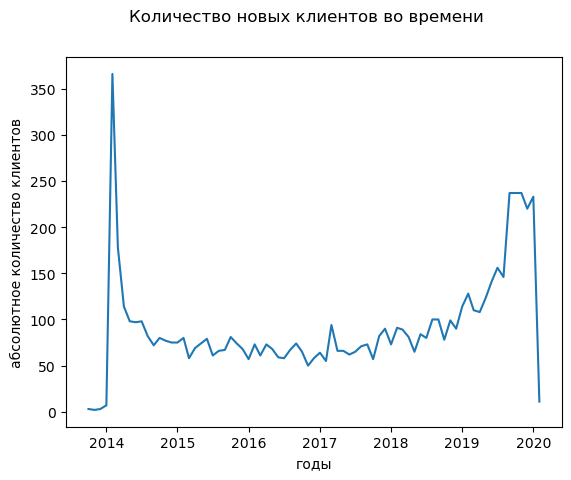

In [7]:
i = df_contract.groupby('BeginDate')['customerID'].count()

fig, ax = plt.subplots()

ax.plot(i.index, i)

fig.suptitle('Количество новых клиентов во времени')
plt.xlabel('годы')
plt.ylabel('абсолютное количество клиентов')
# plt.xticks(i.index)
plt.show()


странные пики в начале и в конце временного промежутка, наверное стоило бы отфильтровать их

In [8]:
'''
# нам интересен 95 процентиль, но так же просмотрим все остальные
df_contract.groupby('BeginDate')['customerID'].count().quantile(
    np.arange(0, 1, 0.05))
'''

"\n# нам интересен 95 процентиль, но так же просмотрим все остальные\ndf_contract.groupby('BeginDate')['customerID'].count().quantile(\n    np.arange(0, 1, 0.05))\n"

In [9]:
'''
df_contract.groupby('BeginDate')['customerID'].count().where(lambda x: x < 234).dropna().plot(title='Количество новых клиентов во времени',
                                                                                              ylabel='абсолютное количество клиентов',
                                                                                              xlabel='годы')
'''

"\ndf_contract.groupby('BeginDate')['customerID'].count().where(lambda x: x < 234).dropna().plot(title='Количество новых клиентов во времени',\n                                                                                              ylabel='абсолютное количество клиентов',\n                                                                                              xlabel='годы')\n"

не совсем уверен как лучше сделать, убрать именно эти выпадающие дни или взять промежуток времени, который находится между этими выпадающими значениями?

UPD:в итоге подумал, что стоит все же взять и провести сплит данных, а не фильтр тех выпадающих значений, то есть уменьшить окно временных данных.

непосредственно фильтр выполню это в конце тетради

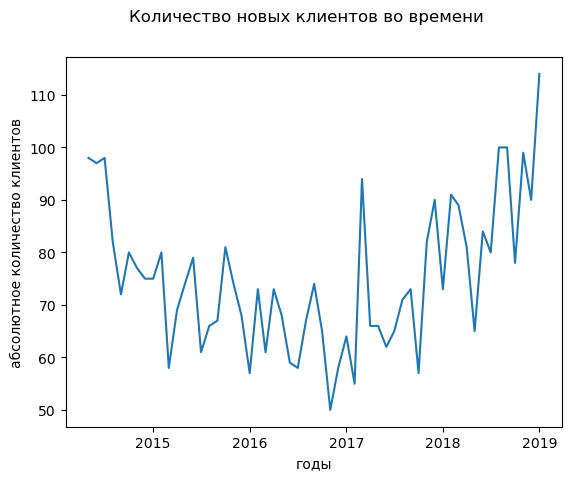

In [10]:
i = df_contract.groupby('BeginDate')['customerID'].count()['2014-05':'2019-01']

fig, ax = plt.subplots()

ax.plot(i.index, i)

fig.suptitle('Количество новых клиентов во времени')
plt.xlabel('годы')
plt.ylabel('абсолютное количество клиентов')
# plt.xticks(i.index)
plt.show()


## EndDate

In [11]:
print(f'''
{round(df_contract['EndDate'].where(lambda x: x == 'No').dropna().shape[0] / df_contract['EndDate'].shape[0] * 100)}% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных ({df_contract.shape[0]}), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?
''')



73% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных (7043), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?



<AxesSubplot:title={'center':'Количество ушедших клиентов во времени'}, xlabel='годы', ylabel='абсолютное количество клиентов'>

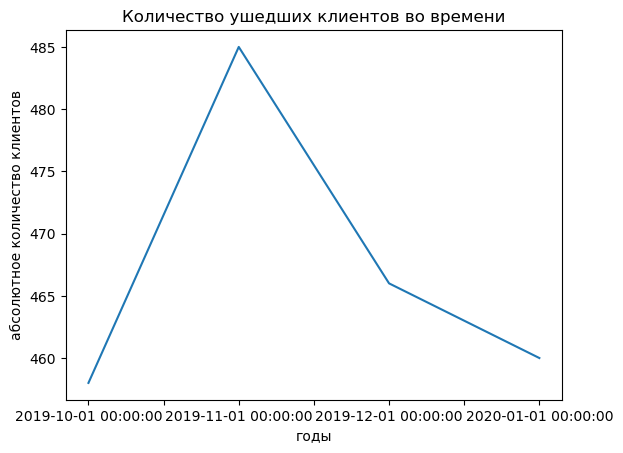

In [12]:
df_contract.query('EndDate != "No"').groupby('EndDate')['customerID'].count().plot(title='Количество ушедших клиентов во времени',
                                                                                   ylabel='абсолютное количество клиентов',
                                                                                   xlabel='годы')


первые ушедшие пользователи появились под конец 2019 года, степень отмены контрактов достигла максимума в октябре 2019 года, после чего видим снижение данного показателя

данный график кажется странным, так как учитывая то, что первые пользователи у данного оператора появились в 2014 году, а впервые пользователи начали уходить спустя почти 6 лет, выглядит сомнительно.

## TotalCharges

In [13]:
'''
# возникает ошибка о том, что существуют клиенты у которых в поле пустая строка
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float')
'''


"\n# возникает ошибка о том, что существуют клиенты у которых в поле пустая строка\ndf_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float')\n"

In [14]:
df_contract.query('TotalCharges == " "')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


в целом не понятная система, если они оплатили сразу за два года, то почему у них нет параметра `TotalCharges`?

то есть контракт на два года, но оплата помесячная?
или предполагается, что мы сами посчитаем на 24 месяца?

In [15]:
print(
    f'''
    так как данные клиенты составляют лишь {round(df_contract.query('TotalCharges == " "').shape[0] / df_contract.shape[0] * 100, 2)}% от общего количества пользователей
    {round(df_contract.query('TotalCharges == " " and Type == "Two year"').shape[0] / df_contract.query('Type == "Two year"').shape[0], 2)}% от пользователей, которые подписали контракт сразу на два года
    {round(df_contract.query('TotalCharges == " " and PaperlessBilling == "No"').shape[0] / df_contract.query('PaperlessBilling == "No"').shape[0], 3)}% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    '''
)



    так как данные клиенты составляют лишь 0.16% от общего количества пользователей
    0.01% от пользователей, которые подписали контракт сразу на два года
    0.003% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    


In [16]:
df_contract = df_contract.query('TotalCharges != " "')

In [17]:
# и успешно меняем тип данных в столбце TotalCharges
# и честно сказать, я не понимаю, как такую конструкцию переделать так, чтобы он не ругался, что я записываю на копию
df_contract['TotalCharges'] = df_contract.loc[:,
                                              'TotalCharges'].astype('float')

## Type

In [18]:
df_contract['Type'].value_counts(normalize=True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64

по параметру типа оплаты, клиенты распределены почти равномерно
- между ежемесячной оплатой и долгосрочной: 55% и 45% соответственно
- между долгосрочными, а то есть ежегодной и каждые 2 года: 21% и 24% соответственно

In [19]:
encoder = LabelEncoder()
df_contract['Type'] = encoder.fit_transform(df_contract['Type'])


In [20]:
encoder.classes_


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

## PaperlessBilling

In [21]:
df_contract['PaperlessBilling'].value_counts(normalize=True)


Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64

наблюдается сдвиг в сторону бумажного счета

данный параметр можно трансформировать в формат [0,1], для меньшего потребления памяти, что ускорит вычисления

и в целом предполагаю, что необходимо будет произвести label encoding признаков

данный параметр имеет тип object, хотя содержит значения 0 и 1

изменим это

In [22]:
df_contract.loc[df_contract.query(
    'PaperlessBilling == "No"').index, 'PaperlessBilling'] = 0
df_contract.loc[df_contract.query(
    'PaperlessBilling == "Yes"').index, 'PaperlessBilling'] = 1
df_contract['PaperlessBilling'] = df_contract['PaperlessBilling'].astype('int')


## PaymentMethod

In [23]:
df_contract['PaymentMethod'].value_counts(normalize=True)


Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64

распределение класснов параметра `PaymentMethod`, так же, почти равномерно распределены, с небольшим сдвигом в сторону Electronic check

In [24]:
df_contract['PaymentMethod'] = encoder.fit_transform(
    df_contract['PaymentMethod'])
encoder.classes_


array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

## MonthlyCharges

In [25]:
df_contract['MonthlyCharges'].describe()


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:ylabel='Density'>

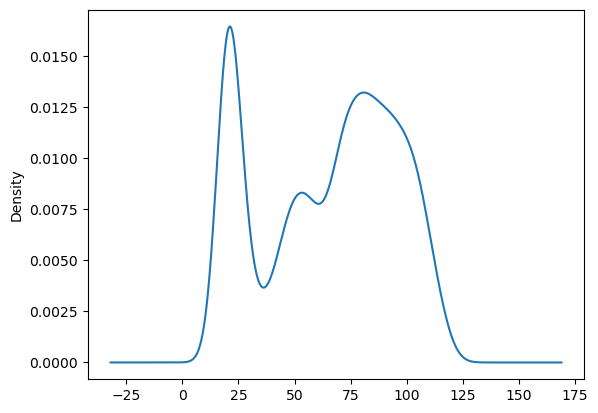

In [26]:
df_contract['MonthlyCharges'].plot(kind='kde')


наибольший пик наблюдается на стоимости 25 за месяц, второй пик на уровне 80 за месяц


## TotalCharges

In [27]:
df_contract['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot:ylabel='Density'>

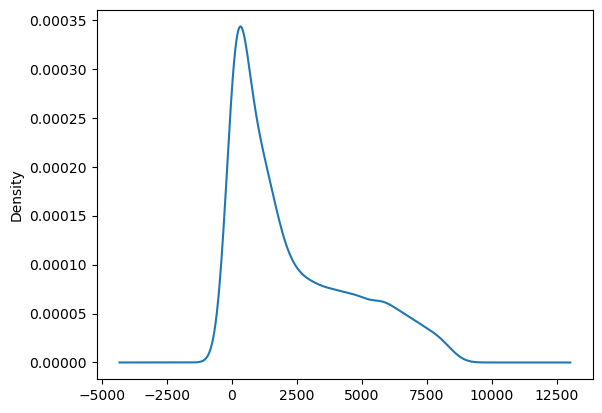

In [28]:
df_contract['TotalCharges'].plot(kind='kde')


основная масса клиентов потратила около 1300

# df_internet

In [29]:
df_internet.head()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [30]:
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [233]:
df_internet.describe()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [34]:
df_internet.describe().iloc[3] / df_internet.describe().iloc[0] * 100

customerID           0.018126
InternetService     56.117455
OnlineSecurity      63.404024
OnlineBackup        55.972449
DeviceProtection    56.099329
TechSupport         62.950879
StreamingTV         50.933478
StreamingMovies     50.480334
dtype: object

интересно, что около половины пользователей в каждой дополнительной услуге пользуется ею.

In [234]:
check_uniques(df_internet)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
InternetService
['DSL' 'Fiber optic']
---
OnlineSecurity
['No' 'Yes']
---
OnlineBackup
['Yes' 'No']
---
DeviceProtection
['No' 'Yes']
---
TechSupport
['No' 'Yes']
---
StreamingTV
['No' 'Yes']
---
StreamingMovies
['No' 'Yes']
---


здесь так же можно каждый параметр кодировать OHE 

In [235]:
# чтобы не печатать все названия признаков руками
df_internet.columns


Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [236]:
df_internet[['InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = pd.get_dummies(df_internet.drop(columns='customerID'), drop_first=True)


In [237]:
df_internet.shape[0] / df_contract.shape[0] * 100


78.45563139931741

данная таблица содержит данные не для каждого клиента, здесь потеряно 22% клиентов,
что уже неприятная потеря. Возможно из за того, что данные услуги были добавлены в процессе развития компании?

и в теории можем попробовать все NaN заменить 0 и посмотреть какая метрика получится у модели

либо использовать библиотеку, где модель может принять данные с потерянными значениями

# df_personal

In [238]:
df_personal.head()


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [239]:
df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [240]:
df_personal.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [241]:
check_uniques(df_personal)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
gender
['Female' 'Male']
---
SeniorCitizen
[0 1]
---
Partner
['Yes' 'No']
---
Dependents
['No' 'Yes']
---


In [242]:
for i in df_personal.columns:
    display(df_personal[i].value_counts(normalize=True))

7590-VHVEG    0.000142
3791-LGQCY    0.000142
6008-NAIXK    0.000142
5956-YHHRX    0.000142
5365-LLFYV    0.000142
                ...   
9796-MVYXX    0.000142
2637-FKFSY    0.000142
1552-AAGRX    0.000142
4304-TSPVK    0.000142
3186-AJIEK    0.000142
Name: customerID, Length: 7043, dtype: float64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

почти все параметры распределены равномерно

помимо `Dependents` у которого сдвиг в сторону "No"
И `SeniorCitizen` у которого сдив в сторону более молодых клиентов

данные параметры все относятся к категориальным, помимо `customerID`, и их можно закодировать.

In [243]:
df_personal[['gender', 'Partner', 'Dependents']] = pd.get_dummies(
    df_personal.drop(columns=['customerID', 'SeniorCitizen']), drop_first=True)


# df_phone

In [244]:
df_phone.head()


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [245]:
df_phone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [246]:
640 / 7000 * 100


9.142857142857142

- если в остальных таблицах было около 7000 пользователей, то здесь на 640 меньше (10%)
- услуга MultiLines выходила позже остальных, поэтому не всем предлагалось?
- тут зависит от того, какую библиотеку мы будем использовать для обучения модели, у некоторых есть возможность принять на вход данные с пропусками.

In [247]:
df_phone.describe(include='all')


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [248]:
check_uniques(df_phone)


customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
---
MultipleLines
['No' 'Yes']
---


имеется только один параметр `MultiLines`
у которого только два значения: No и Yes
так же можем привести к формату [0,1]

данный параметр распределен равномерно

In [249]:
df_phone.loc[df_phone.query(
    'MultipleLines == "No"').index, 'MultipleLines'] = 0
df_phone.loc[df_phone.query(
    'MultipleLines == "Yes"').index, 'MultipleLines'] = 1
df_phone['MultipleLines'] = df_phone['MultipleLines'].astype('int')


# Объединение данных в общую структуру

In [250]:
df_all = df_contract.copy()


In [251]:
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')


In [252]:
i = df_all.drop(columns=['customerID', 'BeginDate', 'EndDate'])


для того, чтобы проверить признаки на наличие проблемы мультиколлинеарности, нам необходимо вычесть VIF (Variance Inflation Factor)

In [253]:
vifs = pd.Series(np.linalg.inv(i.corr().to_numpy()).diagonal(),
                 index=i.columns, name='VIF')
vifs


Type                -1.292362
PaperlessBilling     1.072217
PaymentMethod        1.130660
MonthlyCharges     -15.417803
TotalCharges         2.502657
InternetService     -4.209591
OnlineSecurity       0.726638
OnlineBackup         0.983383
DeviceProtection     0.919849
TechSupport          0.641671
StreamingTV          0.538658
StreamingMovies      0.577939
gender               1.001516
SeniorCitizen        1.134006
Partner              1.426658
Dependents           1.377518
MultipleLines        1.184713
Name: VIF, dtype: float64

так как у признака `MonthlyCharges` VIF больше 10, это обозначате, что в данных имеется проблема мультиколлинеарности

мы можем либо удалить данный признак, либо оставить

в случае, если целью нашего построения модели является получения рабочей модели, то мы можем и оставиь ее,
если же мы хотим после успешного обучения модели посмотреть какие параметры она связала (интерпретация модели), то нам необходимо удалить данный параметр

# Выводы
- все таблицы были просмотрены
- основные проблемы:
    - не соответствие типа данных
    - временные данные вызывают сомнения
        - данные время оформления контракта имеют два сильных пика
        - данные отмены контракта содержат данные только за конец 2019 года
    - имеется проблема мультиколлинеарности
    - потеря данных в двух таблицах:
        - df_internet -- 22% по отношению к df_contract
        - df_phone -- 9.1% по отношению к df_contract
- проведена кодировка данных

# UPD

фильтр данных

In [254]:
start_period = datetime(year=2014, month=5, day=1)
end_period = datetime(year=2019, month=1, day=1)


df_contract = df_contract[(df_contract['BeginDate'] >= start_period) & (
    df_contract['BeginDate'] <= end_period)]


проверим как данный фильтр повлиял на распределение классов

In [255]:
df_all = df_contract.copy()
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')
i = df_all.drop(columns=['customerID', 'BeginDate', 'EndDate'])
vifs = pd.Series(np.linalg.inv(i.corr().to_numpy()).diagonal(),
                 index=i.columns, name='VIF')
display(vifs)

Type                -0.594383
PaperlessBilling     1.142468
PaymentMethod        1.028312
MonthlyCharges     -15.568389
TotalCharges         1.515139
InternetService     -3.765969
OnlineSecurity       0.819504
OnlineBackup         0.948186
DeviceProtection     0.891241
TechSupport          0.635922
StreamingTV          0.574635
StreamingMovies      0.524519
gender               1.001296
SeniorCitizen        1.163035
Partner              1.294264
Dependents           1.368827
MultipleLines        1.100321
Name: VIF, dtype: float64

In [256]:
# проблема с отсутствующими данными осталась
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 0 to 4282
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4283 non-null   object        
 1   BeginDate         4283 non-null   datetime64[ns]
 2   EndDate           4283 non-null   object        
 3   Type              4283 non-null   int64         
 4   PaperlessBilling  4283 non-null   int64         
 5   PaymentMethod     4283 non-null   int64         
 6   MonthlyCharges    4283 non-null   float64       
 7   TotalCharges      4283 non-null   float64       
 8   InternetService   3392 non-null   float64       
 9   OnlineSecurity    3392 non-null   float64       
 10  OnlineBackup      3392 non-null   float64       
 11  DeviceProtection  3392 non-null   float64       
 12  TechSupport       3392 non-null   float64       
 13  StreamingTV       3392 non-null   float64       
 14  StreamingMovies   3392 n

In [257]:
for i in df_all.columns:
    if i == 'customerID' or i == 'BeginDate':
        continue
    print(df_all[i].value_counts(normalize=True))


No                     0.793136
2019-10-01 00:00:00    0.056502
2019-11-01 00:00:00    0.052767
2019-12-01 00:00:00    0.050198
2020-01-01 00:00:00    0.047397
Name: EndDate, dtype: float64
0    0.457156
1    0.296521
2    0.246323
Name: Type, dtype: float64
1    0.59958
0    0.40042
Name: PaperlessBilling, dtype: float64
2    0.313565
0    0.248191
1    0.242820
3    0.195424
Name: PaymentMethod, dtype: float64
20.05     0.007938
19.95     0.006071
20.00     0.005837
19.80     0.005837
19.60     0.005837
            ...   
68.35     0.000233
58.85     0.000233
107.65    0.000233
69.85     0.000233
78.70     0.000233
Name: MonthlyCharges, Length: 1384, dtype: float64
1284.20    0.000700
2317.10    0.000700
470.20     0.000700
1782.40    0.000467
1139.20    0.000467
             ...   
5969.95    0.000233
1082.75    0.000233
565.75     0.000233
4370.75    0.000233
6844.50    0.000233
Name: TotalCharges, Length: 4203, dtype: float64
1.0    0.574882
0.0    0.425118
Name: InternetService, 

данный фильтр не сильно изменил распределение классов в признаках, как и на VIF

# Вопросы

- предполагается, что мы приводим столбец EndDate к формату [0,1]?
    - в данном случае предполагается задача классификации?
- предполагается, что мы будем использовать `Binary Cross-Entropy Loss` как фунцию потерь?
- какие ресурсы есть у компании, чтобы обучить и поддерживать модель?
    - для того, чтобы выбрать тип модели для обучения
- если имеет значение:
    - дополнительные услуги входят в стоимость указанную в признаке `MonthlyCharges`? или мы должны это дополнительно рассчитывать
    - что обозначает признак `MultipleLines`

# План выполнения задачи

1. Уточнение задачи
    - базовая метрика
    - в каком формате необходим итог
    - как будет производиться оценка модели
2. Предобработка данных
    - нахождение и устранение аномалий данных
    - кодирование признаков
    - обработка VIF
    - возможно нормализация данных
3. Обучение модели
    - выбор библиотеки для выполнения поставленной задачи
    - формирование датасетов
    - тестовое обучение
    - настройка гиперпараметров
4. Проверка модели на тестовых данных
    - сравнение результатов с целевыми
    - при необходимости повторить предыдущий пункт
5. Сдача задания
    - отправление кода
    - оценка работы